# 長庚大學 資工系/人工智慧學程  樣形識別/深度學習 課程使用之教材及示範程式 Ch02

In [4]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [5]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [6]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
x= xr[0]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

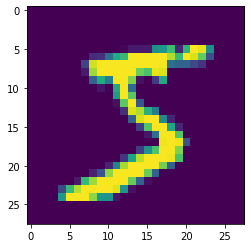

In [8]:
import matplotlib.pyplot as pl
pl.imshow(x)

# 想想看，你能做那些改進來提升正確率 (accuracy) ？


使用範例在同時間測量:

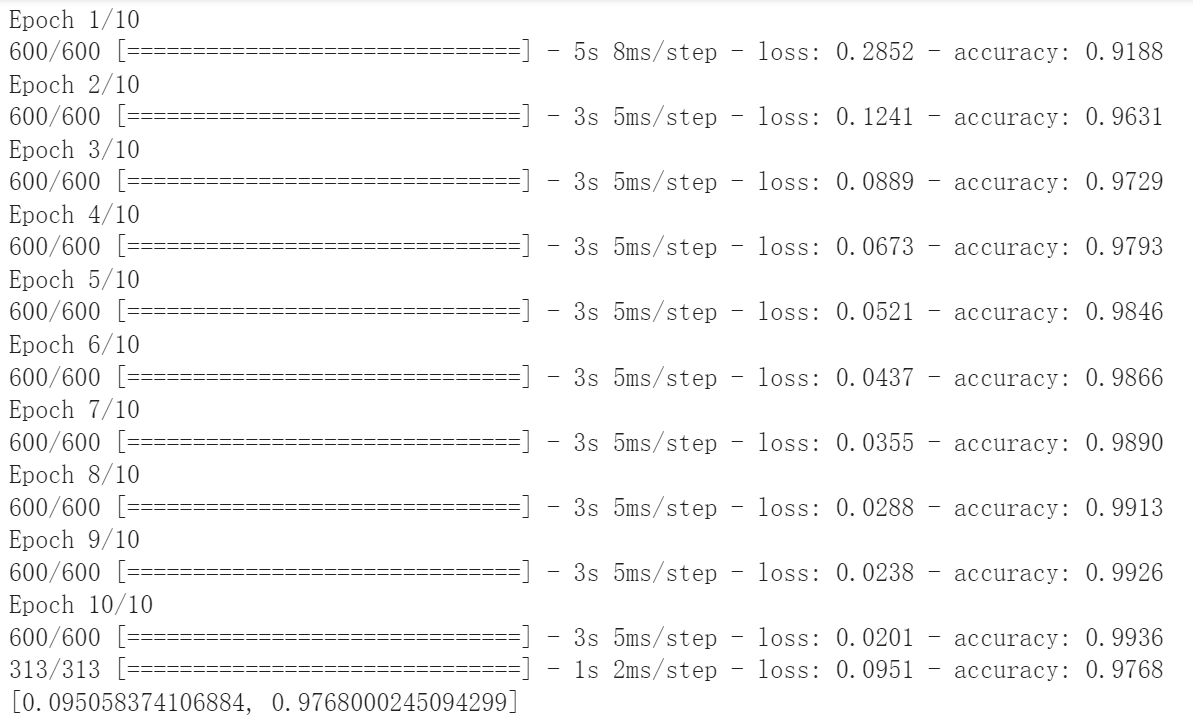


*   增加keras.layers.Dense 係數
*   增加xt.reshape 係數



In [25]:
xr1= xr.reshape(-1,28*28) /255
xt1= xt.reshape(-1,28*28) /255

aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(200, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2766 - accuracy: 0.9202
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1146 - accuracy: 0.9653
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0776 - accuracy: 0.9764
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0598 - accuracy: 0.9822
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0461 - accuracy: 0.9859
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0237 - accuracy: 0.9919
Epoch 9/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0192 - accuracy: 0.9941
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9781

[0.08599352836608887, 0.9781000018119812]

In [26]:
xr1= xr.reshape(-1,28*28) /255
xt1= xt.reshape(-4,28*28) /255

aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(200, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 0.2751 - accuracy: 0.9209
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1155 - accuracy: 0.9646
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0771 - accuracy: 0.9768
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0454 - accuracy: 0.9862
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 9/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9805

[0.0813460722565651, 0.9804999828338623]

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 200)               157000    
                                                                 
 dense_21 (Dense)            (None, 50)                10050     
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


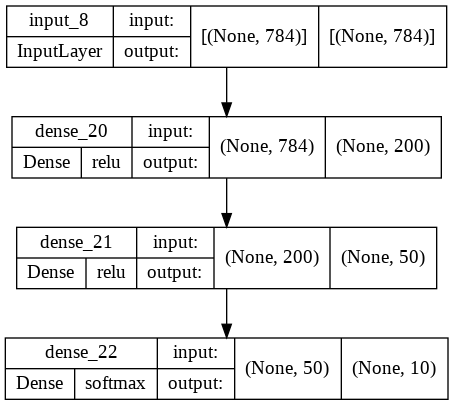

In [27]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)